In [102]:
import numpy as np 
import pandas as pd
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

In [103]:
data = pd.read_csv('Clustering_gmm.csv')

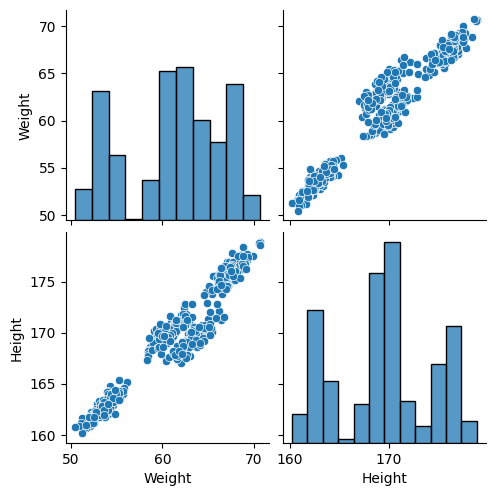

In [104]:
sns.pairplot(data=data)

In [105]:
def plot_BIC_AIC_scores(K, bic_scores, aic_scores):
    plt.figure(figsize=(8, 5))
    plt.plot(K, bic_scores, label='BIC', marker='o', color='hotpink', linestyle='-', linewidth=2)
    plt.plot(K, aic_scores, label='AIC', marker='s', color='royalblue', linestyle='--', linewidth=2)
    plt.title('BIC & AIC for Optimal Clusters')
    plt.xlabel('Number of clusters')
    plt.xticks(K)
    plt.ylabel('Score')
    plt.legend()
    plt.grid()
    plt.show()

In [106]:
def GMM(data, K, n_init=10):
    bic_scores = []  # Store BIC values
    aic_scores = []  # Store AIC values

    for k in K:
        gmm = GaussianMixture(n_components=k, random_state=1234, n_init=n_init)
        gmm.fit(data)
        bic_scores.append(gmm.bic(data))
        aic_scores.append(gmm.aic(data))

    return bic_scores, aic_scores


In [107]:
K = range(1, 11)

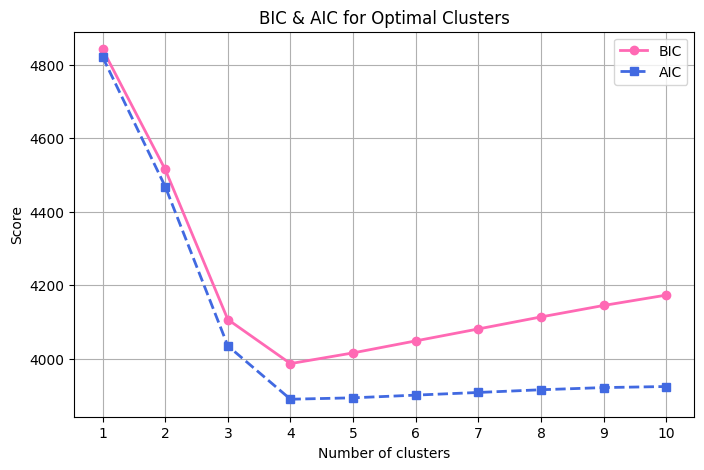

In [108]:
BIC_Score, AIC_Score = GMM(data, K, n_init=10)
plot_BIC_AIC_scores(K, BIC_Score, AIC_Score)

In [109]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

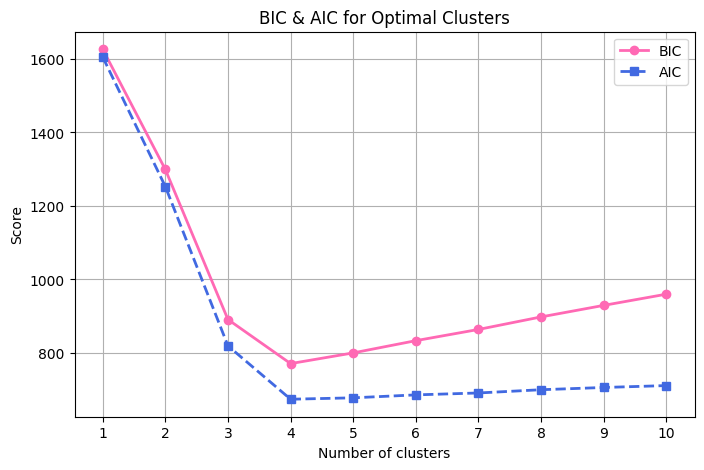

In [111]:
BIC_Score, AIC_Score = GMM(data_scaled, K, n_init=10)
plot_BIC_AIC_scores(K, BIC_Score, AIC_Score)

In [115]:
print("The BIC scores are: ", BIC_Score)
print("The AIC scores are: ", AIC_Score)

The BIC scores are:  [np.float64(1626.3400250214843), np.float64(1299.1601419173296), np.float64(891.0099860030404), np.float64(771.1150781723359), np.float64(800.2170893017224), np.float64(833.5039048045804), np.float64(863.9944249855687), np.float64(898.1182100636361), np.float64(929.4906497982747), np.float64(959.9675791101176)]
The AIC scores are:  [np.float64(1605.2669845293733), np.float64(1252.7994528346856), np.float64(819.3616483298631), np.float64(674.1790919086255), np.float64(677.9934544474788), np.float64(685.9926213598037), np.float64(691.1954929502588), np.float64(700.0316294377931), np.float64(706.1164205818986), np.float64(711.3057013032084)]


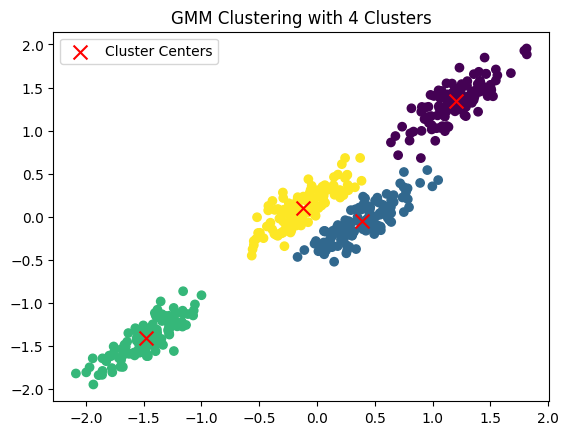

In [121]:
# Fit GMM with the optimal number of clusters
optimal_n_clusters = np.argmin(BIC_Score) + 1 
gmm = GaussianMixture(n_components=optimal_n_clusters, random_state=0)
gmm.fit(data_scaled)

# Predict clusters
predicted_clusters = gmm.predict(data_scaled)

# Visualize the results
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=predicted_clusters, cmap='viridis')
plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1], marker='x', s=100, color='red', label='Cluster Centers')
plt.legend()
plt.title(f'GMM Clustering with {optimal_n_clusters} Clusters')
plt.show()

## BIC is the same with scaled data or without scaled data 

In [ ]:
# Implementing Gaussian Mixture Model 
# Generate a synthetic dataset

from sklearn.datasets import make_blobs

n_samples = 300
n_features = 2
n_clusters = 3
random_state = 42

data, true_labels = make_blobs(n_samples=n_samples, n_features=n_features, centers=n_clusters, random_state=random_state)

## Compare the results with the K_means

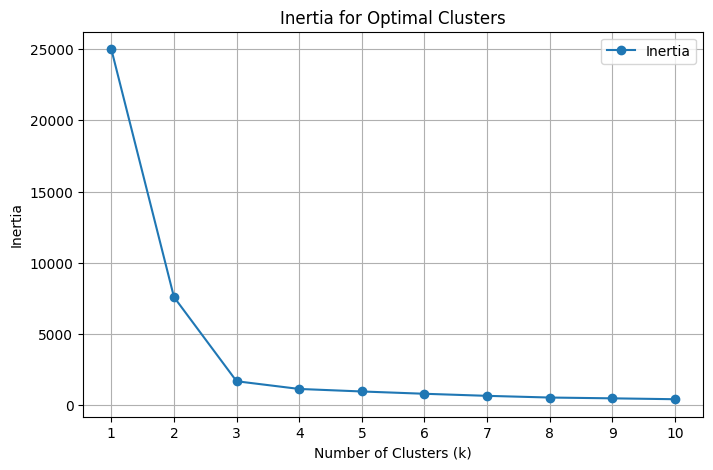

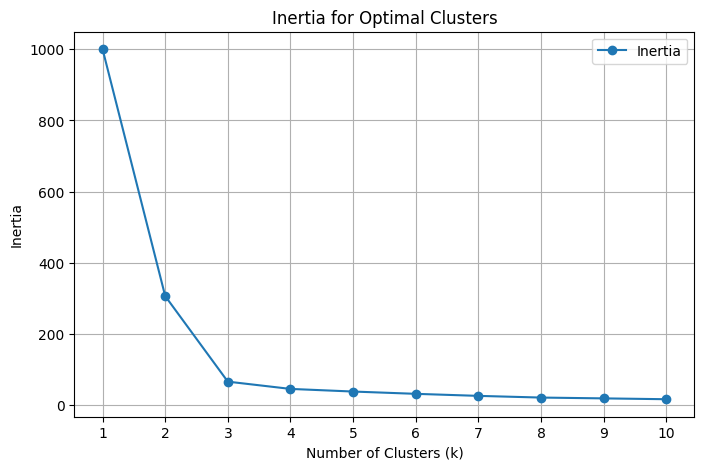

In [39]:
# K_means clustering
K = range(1, 11)
inertia_scores = []  # Store inertia values

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=1234)
    kmeans.fit(data)
    inertia_scores.append(kmeans.inertia_)

# Plot inertia scores
plt.figure(figsize=(8, 5))
plt.plot(K, inertia_scores, marker='o', linestyle='-', label='Inertia')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Inertia for Optimal Clusters')
plt.xticks(K)
plt.legend()
plt.grid()


# what is the optimal number of clusters?
# try with scaled data
K = range(1, 11)
inertia_scores = []  # Store inertia values

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=1234)
    kmeans.fit(data_scaled)
    inertia_scores.append(kmeans.inertia_)

# Plot inertia scores
plt.figure(figsize=(8, 5))
plt.plot(K, inertia_scores, marker='o', linestyle='-', label='Inertia')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Inertia for Optimal Clusters')
plt.xticks(K)
plt.legend()
plt.grid()
# plt.show()



In [26]:
# def plot_data(n_clusters):
#     plt.plot(n_clusters, bic_scores, marker='o')
#     plt.xlabel('Number of Clusters')
#     plt.ylabel('BIC Score')
#     plt.title('BIC Score vs Number of Clusters')
#     plt.show()


In [28]:
# # Using Gaussian Mixture Model
# # plot the elbow curve to find the optimal number of clusters
# # BIC score is used to find the optimal number of clusters
# # BIC is the Bayesian Information Criterion
# # BIC = log(n) * k - 2 * log(L)
# # n = number of data points
# # k = number of clusters
# # L = likelihood of the model
# # BIC is used to compare the quality of the models with different number of clusters
# n_clusters = range(1, 11)  # trying different number of clusters
# bic_scores = []

# for n in n_clusters:
#     gmm = GaussianMixture(n_components=n, random_state=0)
#     gmm.fit(data)
#     bic_scores.append(gmm.bic(data))

# # # Plot BIC scores to find optimal number of clusters
# # plt.plot(n_clusters, bic_scores, marker='o')
# # plt.xlabel('Number of Clusters')
# # plt.ylabel('BIC Score')
# # plt.title('BIC Score vs Number of Clusters')
# # plt.show()

# plot_data(n_clusters)

In [29]:
# # AIc
# n_clusters = range(1, 11)  # trying different number of clusters
# aic_scores = []

# for n in n_clusters:
#     gmm = GaussianMixture(n_components=n, random_state=0)
#     gmm.fit(data)
#     aic_scores.append(gmm.aic(data))

# plot_data(n_clusters)
    

In [ ]:
from scipy.stats import multivariate_normal
from sklearn.datasets import make_blobs

In [129]:
# Generate a synthetic dataset
n_samples = 300
n_features = 2
n_clusters = 3
random_state = 42

data, true_labels = make_blobs(n_samples=n_samples, n_features=n_features, centers=n_clusters, random_state=random_state)

# Implement GMM from scratch
def gmm(X, n_clusters, n_iterations=100):
    """""

    Parameters
    ----------
    X : array-like, shape (n_samples, n_features) "The input data"
    n_clusters : int "The number of clusters"
    n_iterations : int "The number of iterations"

    Returns
    -------
    means : array-like, shape (n_clusters, n_features) "The estimated means of the clusters"
    covariances : list of arrays "The estimated covariance matrices of the clusters"
    weights : array-like, shape (n_clusters,) "The estimated weights of the clusters"

    """

    n_samples, n_features = X.shape # get hte shape of the data

    # choice function is used to randomly select the means from the data points
    # it works by randomly select data points by the number of clusters from the data points so that we can use them as the initial means
    # if K = 3 it will select 3 random data points from the data
    # inplace = False means that the data points will not be replaced it will stay in the data points as it is not deleted
    means = X[np.random.choice(n_samples, n_clusters, replace=False)] # randomly select the means from the data points # shape (n_clusters, n_features)

    # initialize the covariance matrices to identity matrices 
    # shape (n_features, n_features)
    covariances = [np.eye(n_features)] * n_clusters

    # initialize the weights to be equal
    # shape (n_clusters,)
    # devide the weights by the number of clusters to make them equal less than 1
    # initialize the weights to be equal values
    weights = np.ones(n_clusters) / n_clusters
    

    for _ in range(n_iterations):
        # E-step : is to calculate the responsibilities
        responsibilities = []
        for k in range(n_clusters):
            numerator = multivariate_normal.pdf(X, mean=means[k], cov=covariances[k]) * weights[k]
            responsibilities.append(numerator)
        responsibilities = np.array(responsibilities).T
        responsibilities /= responsibilities.sum(axis=1, keepdims=True)
        
        # M-step : is to update the parameters
        total_resp = np.sum(responsibilities, axis=0)
        weights = total_resp / n_samples
        means = (responsibilities.T @ X) / total_resp[:, np.newaxis]
        for k in range(n_clusters):
            diff = X - means[k]
            covariances[k] = ((responsibilities[:, k] * diff.T) @ diff) / total_resp[k]
            
    return means, covariances, weights






In [130]:
# Fit GMM from scratch
estimated_means, estimated_covariances, estimated_weights = gmm(data, n_clusters)

In [131]:
# Assign samples to clusters
def assign_clusters(X, means, covariances, weights):
    n_samples = X.shape[0]
    n_clusters = len(means)
    responsibilities = np.zeros((n_samples, n_clusters))
    for k in range(n_clusters):
        responsibilities[:, k] = multivariate_normal.pdf(X, mean=means[k], cov=covariances[k]) * weights[k]
    cluster_assignments = np.argmax(responsibilities, axis=1)
    return cluster_assignments


In [132]:
predicted_assignments = assign_clusters(data, estimated_means, estimated_covariances, estimated_weights)

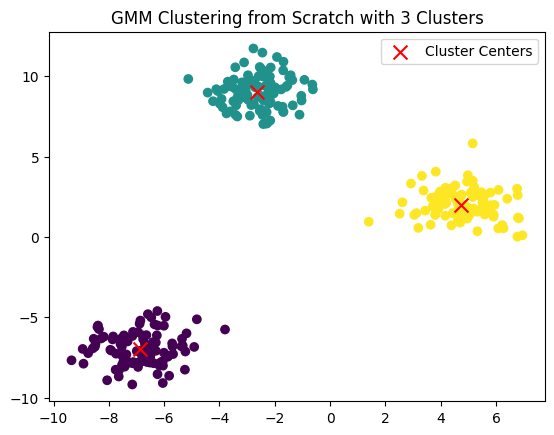

In [133]:
# gmm(data, n_clusters)
# Visualize the results
plt.scatter(data[:, 0], data[:, 1], c=predicted_assignments, cmap='viridis')
plt.scatter(estimated_means[:, 0], estimated_means[:, 1], marker='x', s=100, color='red', label='Cluster Centers')
plt.legend()
plt.title(f'GMM Clustering from Scratch with {n_clusters} Clusters')
plt.show()